In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set parameters
num_vertices = 35
metric_space_dim = 2
A1 = 0.99
A2 = 200

In [14]:
def get_influence(G,timestep):
    in_degrees = dict(G.in_degree(G.nodes()))
    sphere_of_influence = {v: ((A1*in_degrees.get(v))+A2)/timestep for v in G.nodes()}
    return sphere_of_influence

In [4]:
# Plot the graph
def plot_graph(influence = False):
    pos = nx.get_node_attributes(G, 'location')
    nx.draw(G, pos, node_size=20)

    if influence:
        for v in G.nodes():
            sphere_of_influence = get_influence(num_vertices)
            circle = plt.Circle(pos[v], sphere_of_influence[v], color='r', fill=False)
            plt.gca().add_artist(circle)

    plt.show()

In [5]:
def calculate_effective_distance(G):
    G = G.to_undirected()
    # Calculate distances between all pairs of connected nodes
    distances = []
    for v in G.nodes():
        for u in G.nodes():
            if v != u and nx.has_path(G, v, u):
                distances.append(nx.shortest_path_length(G, v, u))

    # Calculate effective diameter
    distances = np.array(distances)
    effective_diameter = np.percentile(distances, 90)

    print("Effective diameter:", effective_diameter)
    return effective_diameter

In [6]:
# # Initialize the graph with a single vertex
# G = nx.DiGraph()
# G.add_node(0,location=np.random.rand(metric_space_dim))

# # Generate new vertices and add edges
# for i in range(1, 10):
#     # Choose location of new vertex in metric space corresponding to uniform distribution
#     location = np.random.rand(metric_space_dim)*10
    
#     # Calculate sphere of influence
#     sphere_of_influence = get_influence(i)
    
#     # Choose existing vertex to link to
#     # Calculate the distances between each vertices
#     distances = {v: np.linalg.norm(location - G.nodes[v]['location']) for v in G.nodes()}
    
#     # Calculate and regularize the probability of connection
#     probabilities = {v: 1 if distances[v]<=sphere_of_influence[v] else 0 for v in G.nodes()}
    
#     # print(distances,sphere_of_influence,probabilities)

#     # Add new vertex and edge
#     G.add_node(i, location=location)
#     for v in G.nodes():
#         if v!=i and probabilities[v]==1:
#             G.add_edge(i, v)
    
#     # plot each time-step
# #     plot_graph(True)

# # Calculate the effective distance
# _ = calculate_effective_distance(G)

# plot_graph(True)

In [7]:
# # Print the degree distribution of the final network
# degrees = dict(G.degree())
# hist, bins = np.histogram(list(degrees.values()), bins=range(max(degrees.values())+2))

In [8]:
# in_degrees = dict(G.in_degree(G.nodes()))

# Run Simulation for Theorem 1.1

In [9]:
l = [0.1,0.2]
np.average(l)

0.15000000000000002

In [12]:
def simulation_effective(num, simulation_round=10):
    effective_distance = []
    
    for _ in range(simulation_round):
        G = nx.DiGraph()
        G.add_node(0,location=np.random.rand(2)*10)

        # Generate new vertices and add edges
        for i in range(1, num):
            # Choose location of new vertex in metric space corresponding to uniform distribution
            location = np.random.rand(metric_space_dim)*10

            # Calculate sphere of influence
            sphere_of_influence = get_influence(G,i)

            # Choose existing vertex to link to
            # Calculate the distances between each vertices
            distances = {v: np.linalg.norm(location - G.nodes[v]['location']) for v in G.nodes()}

            # Calculate and regularize the probability of connection
            probabilities = {v: 1 if distances[v]<=sphere_of_influence[v] else 0 for v in G.nodes()}

            # print(distances,sphere_of_influence,probabilities)

            # Add new vertex and edge
            G.add_node(i, location=location)
            for v in G.nodes():
                if v!=i and probabilities[v]==1:
                    G.add_edge(i, v)
        
        # calculate the effective distance of this graph
        effective_distance.append(calculate_effective_distance(G))
        print(f'{_+1}/{simulation_round}')
    
    ed = np.average(effective_distance)
    record = {'num':num_vertices,'ed':ed}
    return ed

In [17]:
simulation_effective(2000,simulation_round=5)

Effective diameter: 7.0
1/5
Effective diameter: 7.0
2/5
Effective diameter: 7.0
3/5
Effective diameter: 7.0
4/5
Effective diameter: 7.0
5/5


7.0

In [26]:
n= [10,37,40,60,100,120,200,250,300,400,500,600,700,800,900,1000,1500,1900,2000]
ed = [1,1.1,1.8,2.0,2.8,3.0,3.0,3.2,3.9,4.0,4.4,5.0,5.0,5.2,5.6,6.0,6.4,6.9,7.0]

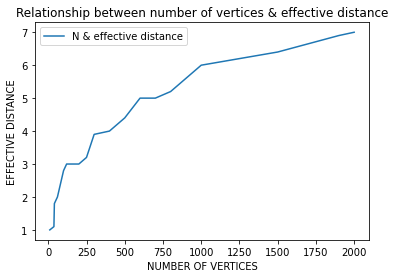

In [29]:
# Generate x values
x = np.linspace(1, 1000, 100)  # Avoid log(0) by starting from a small positive value

# Compute y values
y = np.log(x)**2

# Plot the function
# plt.plot(x, y, label=r'$y = \log^2(x)$')
plt.plot(n, ed, label=r'N & effective distance')

# Add labels and title
plt.xlabel('NUMBER OF VERTICES')
plt.ylabel('EFFECTIVE DISTANCE')
plt.title('Relationship between number of vertices & effective distance')

# Add a legend
plt.legend()

# Show the plot
plt.show()

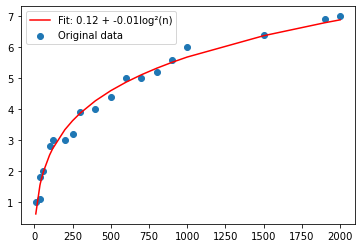

In [28]:
# 使用numpy的polyfit函数拟合一条直线，deg参数为1
coefficients = np.polyfit(np.log(n)**2, ed, 1)

# 创建一个代表拟合直线的函数
fit = np.poly1d(coefficients)

# 绘制原始数据
plt.scatter(n, ed, label='Original data')

# 绘制拟合直线
plt.plot(n, fit(np.log(n)**2), color='red', label='Fit: {:.2f} + {:.2f}log²(n)'.format(*coefficients))

plt.legend()
plt.show()